# Answer-1.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load tf_flowers dataset with 80:20 split
(ds_train_raw, ds_test_raw), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Image size and batch settings
IMG_SIZE = 128
BATCH_SIZE = 32
NUM_CLASSES = ds_info.features['label'].num_classes


In [4]:
# Preprocessing: resize + normalize
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing
ds_train = ds_train_raw.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test_raw.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [5]:
# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Model summury
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(ds_train, validation_data=ds_test, epochs=10)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.3450 - loss: 1.4260 - val_accuracy: 0.5368 - val_loss: 1.1734
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.5204 - loss: 1.1868 - val_accuracy: 0.6104 - val_loss: 1.0277
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6222 - loss: 0.9543 - val_accuracy: 0.6444 - val_loss: 0.9067
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6645 - loss: 0.8528 - val_accuracy: 0.6894 - val_loss: 0.8450
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7251 - loss: 0.7114 - val_accuracy: 0.6526 - val_loss: 0.9101
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7709 - loss: 0.6448 - val_accuracy: 0.7166 - val_loss: 0.7322
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8314 - loss: 0.4916 - val_accuracy: 0.7153 - val_loss: 0.7703
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8471 - loss: 0.4115 - val_accuracy: 0.7098 -

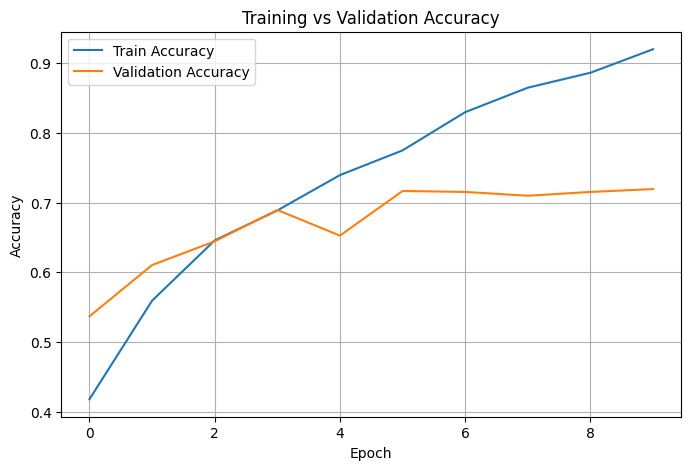

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Evaluate on test set
y_true, y_pred = [], []
for images, labels in ds_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


In [10]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=ds_info.features['label'].names))


Classification Report:

              precision    recall  f1-score   support

   dandelion       0.73      0.80      0.76       159
       daisy       0.66      0.70      0.68       120
      tulips       0.70      0.74      0.72       186
  sunflowers       0.77      0.87      0.82       138
       roses       0.73      0.46      0.56       131

    accuracy                           0.72       734
   macro avg       0.72      0.71      0.71       734
weighted avg       0.72      0.72      0.71       734



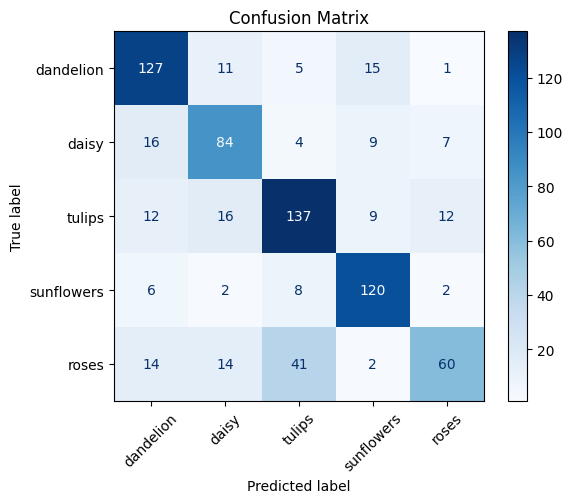

In [11]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds_info.features['label'].names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Answer-2.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [20]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/EE708/A5_P1.csv")
data = df['Close'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
X, y = [], []
for i in range(60, len(data_scaled)):
    X.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split 80:20
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    LSTM(50),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0156 - val_loss: 0.0021
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7526e-04 - val_loss: 0.0017
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1771e-04 - val_loss: 0.0016
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.5233e-04 - val_loss: 0.0017
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5356e-04 - val_loss: 0.0020
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.7915e-04 - val_loss: 0.0030
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3600e-04 - val_loss: 0.0013
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0494e-04 - val_loss: 0.0013
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3333e-04 - val_loss: 0.0017
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4630e-04 - val_loss: 0.0011
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.7397e-04 - val_loss: 0.0020
Epoch 12/20
49/49 ━━━━━

In [23]:
# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


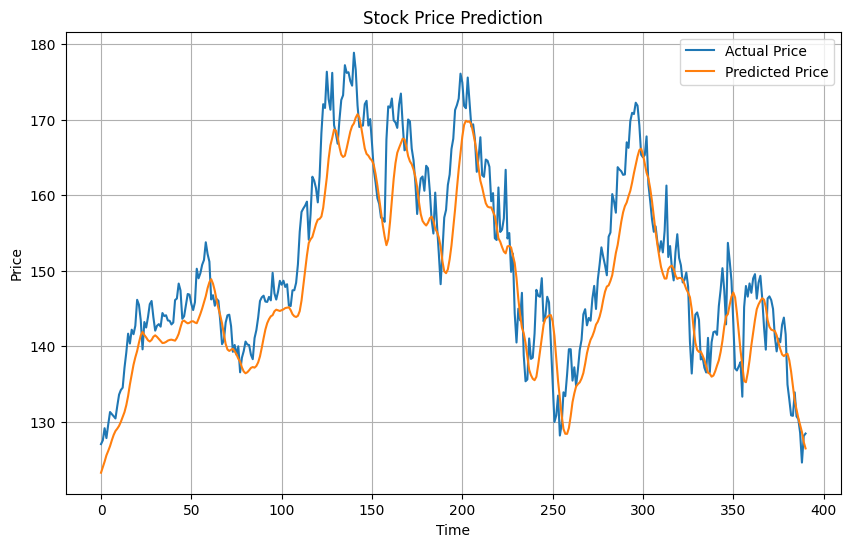

In [24]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
